<a href="https://colab.research.google.com/github/Rumcohol/LocustABM/blob/main/Locust_Model_RupeshNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collision avoidance + neighbours based on distance and angle

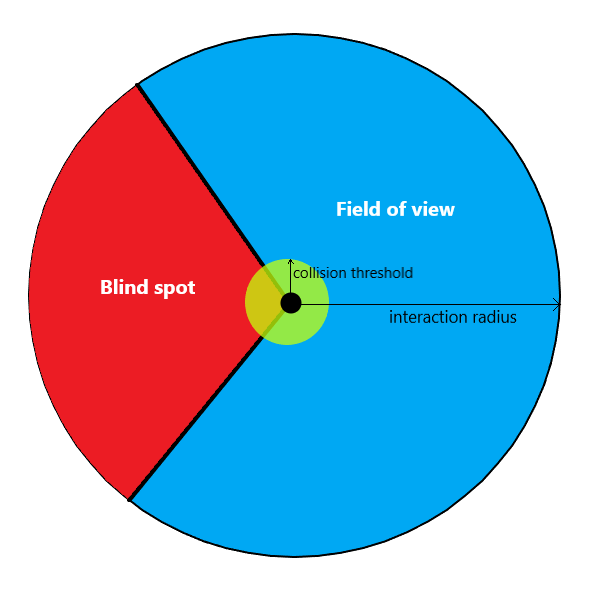

*Rupesh Mahore. April 2023*

This agent-based model simulates the behavior of locusts in a two-dimensional grid. The model considers individual locust agents that interact with their neighbors based on certain rules and behaviors.

Here's a breakdown of the key components and behaviors in the model:

1. **Simulation parameters**: The model starts by defining various simulation parameters such as the number of locust agents (`n_agents`), the size of the simulation grid (`grid_size`), the number of simulation time steps (`time_steps`), and thresholds for different behaviors.

2. **Initialization**: Locust agents are randomly assigned positions and orientations within the grid.

3. **Update function**: The `update` function is the core of the model, which is called in each frame of the animation. It performs the following steps:

   - **Compute distances between locusts**: Using the Euclidean distance formula, the distances between all pairs of locust agents are calculated and stored in the `dist` array.
   
   - **Find neighbors**: For each locust agent, its neighbors are determined based on distance and angle criteria. The locust's local neighborhood is defined by the `neighborhood_size` parameter, and the `neighborhood_angle` determines the maximum angle between the orientation of a locust and the vector connecting the locusts. The neighbors are stored in the `neighbors` list.
   
   - **Compute average orientation**: The average orientation of each locust's neighbors is calculated and stored in the `avg_orient` array.
   
   - **Update locust positions and orientations**: For each locust agent, its behavior is determined based on random probabilities and thresholds. There are two possible behaviors: marching and band formation.
   
     - *Marching behavior*: If a locust agent's random value is below the `marching_threshold`, it will exhibit marching behavior. In this case, the locust's orientation is set to the average orientation of its neighbors plus a small random perturbation.
     
     - *Band formation behavior*: If a locust agent's random value is above the `marching_threshold`, it will attempt to form a band. If another locust is present in its neighbors, the locust agent's orientation is set to match the orientation of the closest neighboring locust.
     
   - **Collision avoidance behavior**: To avoid collisions, locust agents check the distances to other agents. If the distance is below the `collision_threshold`, the agents adjust their orientations to move away from each other.
   
   - **Update positions and enforce periodic boundary conditions**: Finally, the locust agents update their positions by moving in the direction determined by their orientations. The positions are then adjusted to enforce periodic boundary conditions, allowing the locusts to move from one edge of the grid to the opposite edge seamlessly.
   
   - **Update locust colors**: The color of each locust is determined based on its movement state. Locusts with an average orientation of 0 are colored black, while those with orientations close to the average orientation of their neighbors are colored red. The remaining locusts are colored blue.
   
   - **Update visualization**: The animation frame is updated by clearing the axis, setting the axis limits, and drawing the locust positions and orientations using quiver plots.
   
4. **Animation**: The `FuncAnimation` function from the `matplotlib.animation` module is used to create the animation. It calls the `update` function for each frame, iterating through the specified range of time steps.

5. **Saving the animation**: The animation is saved as a video file (MP4 format) using the `save` method of the animation object. The `Writer` class from the `animation.writers` module is used to configure the video settings, such as frame rate (`fps`), metadata

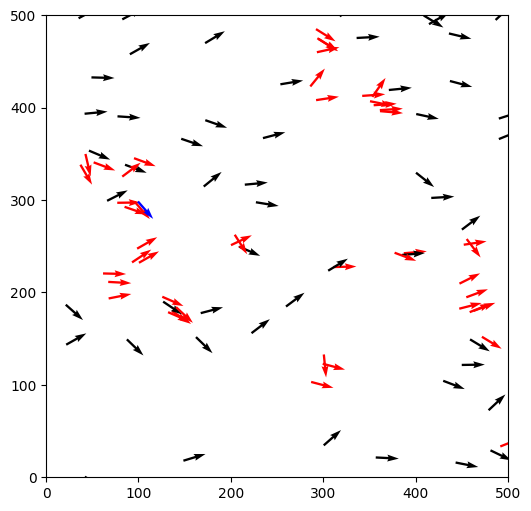

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation


# Define simulation parameters
n_agents = 100    # Number of locust agents
grid_size = 500   # Size of the simulation grid
time_steps = 100  # Number of simulation time steps
neighborhood_size = 20  # Size of the locust's local neighborhood
neighborhood_angle = 2*np.pi/3 # Maximum angle between orientation and vector connecting locusts
p0=0.4
marching_threshold = p0  # Threshold for determining if a locust will march
band_threshold = 1-p0  # Threshold for determining if a locust will form a band
collision_threshold = 0.5  # Distance threshold for collision avoidance behavior

# Initialize locust agents with random positions and orientations
pos = np.random.rand(n_agents, 2) * grid_size
orient = np.random.rand(n_agents) * 2 * np.pi

# Create figure and axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlim([0, grid_size])
ax.set_ylim([0, grid_size])
ax.set_aspect('equal')

# Define the update function for the animation
def update(frame):
    # Compute distances between locusts
    dist = np.linalg.norm(pos[:, None, :] - pos[None, :, :], axis=-1)

    # Find neighbors of each locust based on distance and angle
    neighbors = []
    for i in range(n_agents):
        d = dist[i, :]
        theta = orient[i] - np.arctan2(pos[:, 1] - pos[i, 1], pos[:, 0] - pos[i, 0])
        theta = np.mod(theta + np.pi, 2*np.pi) - np.pi
        n = np.where((d <= neighborhood_size) & (d > 0) & (np.abs(theta) <= neighborhood_angle))[0]
        neighbors.append(n)

    # Compute the average orientation of each locust's neighbors
    avg_orient = np.zeros(n_agents)
    for i in range(n_agents):
        n = neighbors[i]
        if len(n) == 0:
            continue
        avg_orient[i] = np.mean(orient[n])

    # Update locust positions and orientations
    for i in range(n_agents):
        # Decide whether to march or form a band
        if np.random.rand() < marching_threshold:
            # Marching behavior
            orient[i] = avg_orient[i] + (np.random.rand() * np.pi / 100 )
        else:
            # Band formation behavior
            if np.random.rand() < band_threshold:
                # Form a band
                neighbors_i = neighbors[i]
                if len(neighbors_i) == 0:
                    continue
                dist_i = dist[i, neighbors_i]
                closest = np.argmin(dist_i)
                closest_locust = neighbors_i[closest]
                orient[i] = orient[closest_locust]




        # Collision avoidance behavior
            for i in range(n_agents):
                for j in range(n_agents):
                    if i == j:
                        continue
                    if dist[i, j] < collision_threshold:
                        # Move agents away from each other
                        diff = pos[i, :] - pos[j, :]
                        angle = np.arctan2(diff[1], diff[0])
                        orient[i] = angle + np.pi / 2
                        orient[j] = angle - np.pi / 2

            # Update locust positions and orientations
            for i in range(n_agents):
                # Decide whether to march or form a band
                if np.random.rand() < marching_threshold:
                    # Marching behavior
                    orient[i] = avg_orient[i] + (np.random.rand() * np.pi / 2 - np.pi / 4)
                else:
                    # Band formation behavior
                    if np.random.rand() < band_threshold:
                        # Form a band
                        neighbors_i = neighbors[i]
                        if len(neighbors_i) == 0:
                            continue
                        dist_i = dist[i, neighbors_i]
                        closest = np.argmin(dist_i)
                        closest_locust = neighbors_i[closest]
                        orient[i] = orient[closest_locust]

                # Update position
                pos[i, :] += [np.cos(orient[i]), np.sin(orient[i])]

                # Enforce periodic boundary conditions
                pos[i, :] = np.mod(pos[i, :] + grid_size, grid_size)

            # Update the color of each locust based on its movement state
            color = np.where(avg_orient == 0, 'black', np.where(np.abs(avg_orient - orient) < np.pi / 2, 'red', 'blue'))

            # Clear axis and draw locust positions

            # Clear axis and draw locust positions
            ax.clear()
            ax.set_xlim([0, grid_size])
            ax.set_ylim([0, grid_size])
            ax.set_aspect('equal')

            #ax.scatter(pos[:, 0], pos[:, 1], s=5, c=color)
            ax.quiver(pos[:, 0], pos[:, 1], np.cos(orient), np.sin(orient),color=color, scale=20, width=0.005)

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=range(time_steps))

# Save the animation as a video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=1800)
#anim.save('locusts_pband1_pmar0.mp4', writer=writer)
anim.save('locusts'+'r=' +str(neighborhood_size)+'p_band' +str(marching_threshold) + '_pmar' + str(band_threshold) + '.mp4', writer=writer)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

# Save files

In [ ]:
import openpyxl

# Create a new workbook
workbook = openpyxl.Workbook()

# Create a new sheet
sheet = workbook.active

# Add headers
sheet.cell(row=1, column=1, value='Time Step')
sheet.cell(row=1, column=2, value='Agent ID')
sheet.cell(row=1, column=3, value='X')
sheet.cell(row=1, column=4, value='Y')
sheet.cell(row=1, column=5, value='Orientation')

# Add data
for t in range(time_steps):
    for i in range(n_agents):
        sheet.cell(row=t*n_agents+i+2, column=1, value=t+1)
        sheet.cell(row=t*n_agents+i+2, column=2, value=i+1)
        sheet.cell(row=t*n_agents+i+2, column=3, value=pos[i, 0])
        sheet.cell(row=t*n_agents+i+2, column=4, value=pos[i, 1])
        sheet.cell(row=t*n_agents+i+2, column=5, value=orient[i])

# Save the workbook
workbook.save('locusts_pband' + str(marching_threshold) + '_pmar' + str(band_threshold) + '.xlsx')

ValueError: ignored

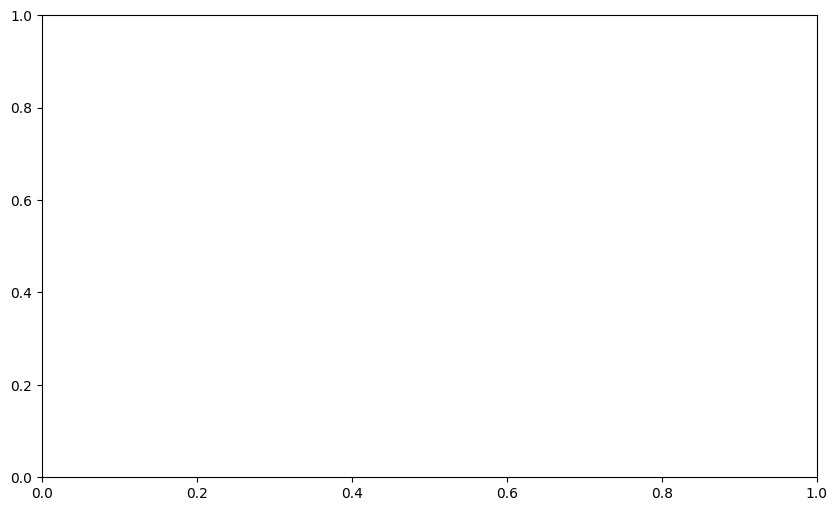

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
file_path = 'locusts1k_r=30p_band0.4_pmar0.6.xlsx'
df = pd.read_excel(file_path)

# Separate the data for X and Y coordinates
x_values = df['X']
y_values = df['Y']

# Create the quiver plot
plt.figure(figsize=(10, 6))
plt.quiver(x_values[:-1], y_values[:-1], x_values[1:] - x_values[:-1], y_values[1:] - y_values[:-1],
           scale_units='xy', angles='xy', scale=1, color='b', label='Displacement')
plt.scatter(x_values, y_values, c='r', marker='o', label='Positions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Agent Movement (Quiver Plot)')
plt.grid(True)
plt.show()


Degree Distribution and clustering coefficient

In [ ]:
import openpyxl
import numpy as np
import math
import matplotlib.pyplot as plt


# Set threshold distance and threshold angle
neighborhood_size = 20
threshold_distance = neighborhood_size
threshold_angle = 2*math.pi/3

# Load data from Excel file
workbook = openpyxl.load_workbook('locusts1k_r=30p_band0.4_pmar0.6.xlsx')
sheet = workbook.active
time_steps = 1000
n_agents = 100
pos = np.zeros((n_agents, 2))
orient = np.zeros(n_agents)
deg=np.zeros((time_steps,n_agents))
binary_distance_matrix = np.zeros((n_agents, n_agents))
binary_angle_matrix = np.zeros((n_agents, n_agents))

# Initialize matrices for distance and angle
distance_matrix = np.zeros((n_agents, n_agents))
angle_matrix = np.zeros((n_agents, n_agents))




# Loop over time steps
for t in range(time_steps):
    # Update positions and orientations
    for i in range(n_agents):
        pos[i, 0] = sheet.cell(row=t*n_agents+i+2, column=3).value
        pos[i, 1] = sheet.cell(row=t*n_agents+i+2, column=4).value
        orient[i] = sheet.cell(row=t*n_agents+i+2, column=5).value


    # Compute distance and angle matrices
    for i in range(n_agents):
        for j in range(i+1, n_agents):
            dx = -(pos[i, 0] - pos[j, 0])
            dy = -(pos[i, 1] - pos[j, 1])
            distance = math.sqrt(dx*dx + dy*dy)
            angle = abs(math.atan2(dy,dx) - orient[j])

            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance
            distance_matrix[i, i]= 0
            angle_matrix[i, j] = angle


    # Threshold distance matrix and create binary matrix

    binary_distance_matrix[distance_matrix <= threshold_distance] = 1

     #Threshold angle matrix and create binary matrix

    binary_angle_matrix[angle_matrix <= threshold_angle] = 1
    deg[t,:]=(sum(binary_distance_matrix))




In [ ]:
binary_angle_matrix[1]

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
deg

array([[ 5., 15.,  4., ...,  2.,  3.,  3.],
       [ 5., 15.,  4., ...,  2.,  3.,  3.],
       [ 5., 15.,  4., ...,  2.,  3.,  3.],
       ...,
       [ 5., 15.,  4., ...,  2.,  3.,  3.],
       [ 5., 15.,  4., ...,  2.,  3.,  3.],
       [ 5., 15.,  4., ...,  2.,  3.,  3.]])

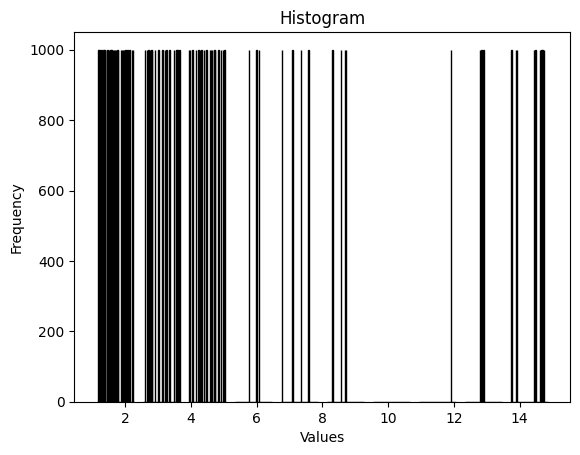

In [ ]:
plt.hist(deg, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()

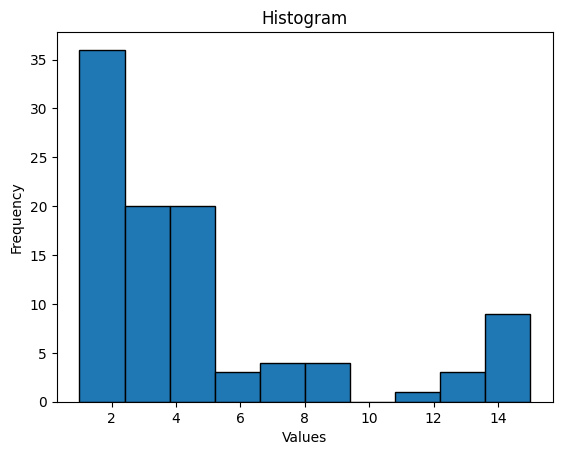

In [ ]:
plt.hist(deg[10,:], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()

In [ ]:
deg[10,:]

array([ 5., 15.,  4.,  7.,  2.,  3.,  2.,  2.,  1.,  5.,  1.,  3.,  1.,
       14.,  8.,  3., 14.,  2.,  3.,  5.,  1.,  1.,  3.,  3.,  3.,  4.,
        1.,  2.,  2.,  5.,  2.,  7.,  1.,  3.,  4.,  2.,  1.,  6.,  8.,
        2., 13.,  4.,  3.,  1., 13.,  5.,  1.,  5.,  9.,  1., 13.,  9.,
        1.,  3.,  7.,  1.,  2.,  5.,  6.,  3.,  5., 15.,  5.,  3.,  6.,
        1., 15.,  1.,  4.,  4.,  4.,  2.,  3.,  2.,  7.,  2.,  1.,  1.,
        2., 15.,  4.,  1., 14.,  1.,  3., 14., 11.,  4.,  2., 14.,  3.,
        3.,  4.,  3.,  1.,  3.,  5.,  2.,  3.,  3.])

In [ ]:
deg[100,:]

array([ 5., 15.,  4.,  7.,  2.,  3.,  2.,  2.,  1.,  5.,  1.,  3.,  1.,
       14.,  8.,  3., 14.,  2.,  3.,  5.,  1.,  1.,  3.,  3.,  3.,  4.,
        1.,  2.,  2.,  5.,  2.,  7.,  1.,  3.,  4.,  2.,  1.,  6.,  8.,
        2., 13.,  4.,  3.,  1., 13.,  5.,  1.,  5.,  9.,  1., 13.,  9.,
        1.,  3.,  7.,  1.,  2.,  5.,  6.,  3.,  5., 15.,  5.,  3.,  6.,
        1., 15.,  1.,  4.,  4.,  4.,  2.,  3.,  2.,  7.,  2.,  1.,  1.,
        2., 15.,  4.,  1., 14.,  1.,  3., 14., 11.,  4.,  2., 14.,  3.,
        3.,  4.,  3.,  1.,  3.,  5.,  2.,  3.,  3.])

In [ ]:
binary_distance_matrix[93,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

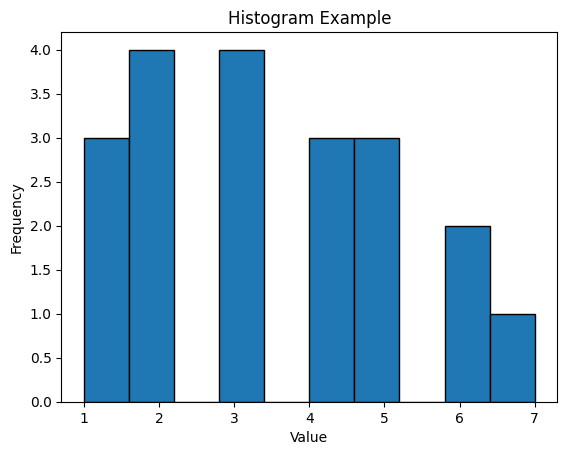

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace this with your data)
data = [1, 3, 5, 2, 4, 3, 2, 5, 6, 7, 3, 4, 5, 2, 1, 1, 4, 6, 2, 3]

# Plot the histogram
plt.hist(data, bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')

# Show the plot
plt.show()


In [ ]:
binary_angle_matrix

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.]])

In [ ]:
distance_matrix

array([[  0.        , 125.03817123,  36.44961191, ..., 489.78749041,
        324.26417441, 108.72489829],
       [125.03817123,   0.        , 120.49071297, ..., 369.44306345,
        292.79223637, 142.05592024],
       [ 36.44961191, 120.49071297,   0.        , ..., 473.08599591,
        288.44435569,  72.2752989 ],
       ...,
       [489.78749041, 369.44306345, 473.08599591, ...,   0.        ,
        379.63812204, 447.03887426],
       [324.26417441, 292.79223637, 288.44435569, ..., 379.63812204,
          0.        , 218.05520405],
       [108.72489829, 142.05592024,  72.2752989 , ..., 447.03887426,
        218.05520405,   0.        ]])

(array([[1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
            0.],
        [1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
            0.],
        [1000.,    0.

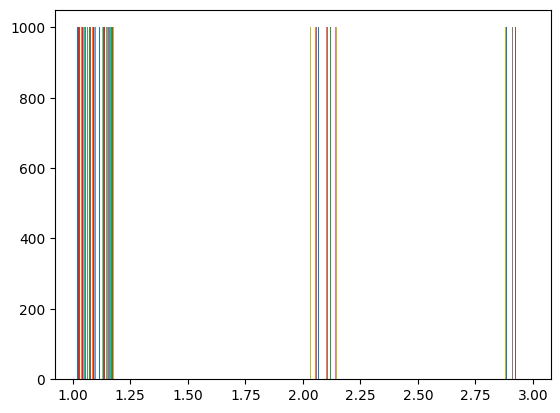

In [ ]:

plt.hist(deg)

In [ ]:
import openpyxl
import networkx as nx
import matplotlib.pyplot as plt

# Load the Excel sheet
workbook = openpyxl.load_workbook('locust_data_a200.xlsx')
sheet = workbook.active

# Read the data from the sheet
data = []
for row in sheet.iter_rows(min_row=2, values_only=True):
    data.append(row[2:4])  # Assuming X and Y coordinates are in columns 3 and 4

# Create a network graph
G = nx.Graph()

# Add nodes with positions as attributes
for i, position in enumerate(data):
    G.add_node(i + 1, pos=position)

# Calculate distances and add edges
for i in range(1, len(data) + 1):
    for j in range(i + 1, len(data) + 1):
        pos_i = G.nodes[i]['pos']
        pos_j = G.nodes[j]['pos']
        distance = ((pos_i[0] - pos_j[0]) ** 2 + (pos_i[1] - pos_j[1]) ** 2) ** 0.5
        G.add_edge(i, j, distance=distance)

# Calculate degree distribution
degrees = [degree for _, degree in G.degree()]
degree_counts = nx.degree_histogram(G)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Plot the degree distribution
plt.bar(range(len(degree_counts)), degree_counts)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

print('Clustering Coefficient:', clustering_coefficient)


KeyboardInterrupt: ignored

# Network parameters

In [ ]:
import numpy as np
import openpyxl

n_agents=100

# Load data from the Excel file
workbook = openpyxl.load_workbook('locust_data_a200.xlsx')
sheet = workbook.active
time_steps = sheet.max_row // n_agents
pos = np.zeros((n_agents, 2, time_steps))
orient = np.zeros((n_agents, time_steps))
for t in range(time_steps):
    for i in range(n_agents):
        row = t * n_agents + i + 2
        pos[i, :, t] = [sheet.cell(row=row, column=3).value, sheet.cell(row=row, column=4).value]
        orient[i, t] = sheet.cell(row=row, column=5).value

# Calculate distance matrix
dist_matrix = np.zeros((n_agents, n_agents, time_steps))
for t in range(time_steps):
    for i in range(n_agents):
        for j in range(i+1, n_agents):
            dist = np.linalg.norm(pos[i, :, t] - pos[j, :, t])
            dist_matrix[i, j, t] = dist
            dist_matrix[j, i, t] = dist

# Threshold distance matrix
thresh_dist = 5.0
binary_dist_matrix = np.zeros_like(dist_matrix)
binary_dist_matrix[dist_matrix <= thresh_dist] = 1

# Calculate angle matrix
angle_matrix = np.zeros((n_agents, n_agents, time_steps))
for t in range(time_steps):
    for i in range(n_agents):
        for j in range(i+1, n_agents):
            vec_ij = pos[j, :, t] - pos[i, :, t]
            angle_matrix[i, j, t] = np.arctan2(vec_ij[1], vec_ij[0]) - orient[i, t]
            angle_matrix[j, i, t] = np.arctan2(-vec_ij[1], -vec_ij[0]) - orient[j, t]
            # Adjust angles to range [-pi, pi)
            angle_matrix[i, j, t] = (angle_matrix[i, j, t] + np.pi) % (2*np.pi) - np.pi
            angle_matrix[j, i, t] = (angle_matrix[j, i, t] + np.pi) % (2*np.pi) - np.pi

# Threshold angle matrix
thresh_angle = np.pi/2
binary_angle_matrix = np.zeros_like(angle_matrix)
binary_angle_matrix[np.abs(angle_matrix) <= thresh_angle] = 1


FileNotFoundError: ignored

In [ ]:
import openpyxl

# Load the workbook
workbook = openpyxl.load_workbook('locust_data_a200.xlsx')
range_threshold = 5

# Select the active sheet
sheet = workbook.active

# Get the maximum row number
max_row = sheet.max_row

# Initialize degree distribution dictionary
degree_distribution = {}

# Initialize clustering coefficient variables
triangle_count = 0
triplet_count = 0

# Iterate over the rows starting from the second row
for row in sheet.iter_rows(min_row=2, values_only=True):
    agent_id = row[1]
    x = row[2]
    y = row[3]

    # Calculate degree (number of connections) for each locust
    degree = 0

    # Calculate clustering coefficient for each locust
    triangles = 0
    triplets = 0

    # Iterate over the rows again to compare against other locusts
    for other_row in sheet.iter_rows(min_row=2, values_only=True):
        other_agent_id = other_row[1]
        other_x = other_row[2]
        other_y = other_row[3]

        # Skip if it's the same locust
        if agent_id == other_agent_id:
            continue

        # Calculate distance between the locusts
        distance = ((x - other_x) ** 2 + (y - other_y) ** 2) ** 0.5

        # If they are within a certain range, consider them connected
        if distance <= range_threshold:
            degree += 1

            # Check for triangles (two connected locusts that are also connected to each other)
            for third_row in sheet.iter_rows(min_row=2, values_only=True):
                third_agent_id = third_row[1]
                third_x = third_row[2]
                third_y = third_row[3]

                # Skip if it's the same locust or one of the previous locusts
                if (
                    third_agent_id == agent_id
                    or third_agent_id == other_agent_id
                ):
                    continue

                # Calculate distances between the locusts
                distance1 = ((x - third_x) ** 2 + (y - third_y) ** 2) ** 0.5
                distance2 = ((other_x - third_x) ** 2 + (other_y - third_y) ** 2) ** 0.5

                # If the third locust is connected to both of the first two locusts, it forms a triangle
                if distance1 <= range_threshold and distance2 <= range_threshold:
                    triangles += 1

            triplets += 1

    # Update the degree distribution dictionary
    if degree in degree_distribution:
        degree_distribution[degree] += 1
    else:
        degree_distribution[degree] = 1

    # Update clustering coefficient variables
    triangle_count += triangles
    triplet_count += triplets

# Calculate the average clustering coefficient
clustering_coefficient = triangle_count / triplet_count

# Print the degree distribution
print("Degree Distribution:")
for degree, count in degree_distribution.items():
    print(f"Degree {degree}: {count} nodes")

# Print the clustering coefficient
print(f"Clustering Coefficient: {clustering_coefficient}")


KeyboardInterrupt: ignored

# One extra agent with larger influence

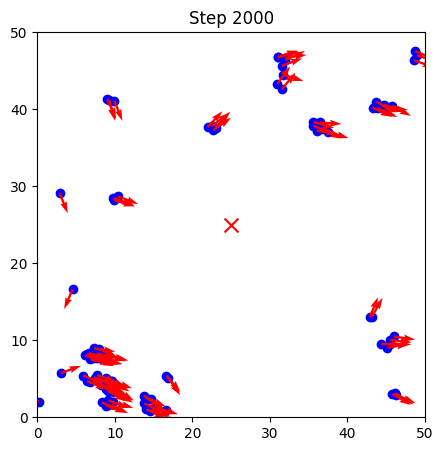

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set parameters
N = 100  # number of agents
L = 50.0  # size of square region
v = 0.10  # magnitude of velocity
eta = 0.1  # noise strength
r = 1.0  # interaction radius
num_steps = 2000  # number of simulation steps
repulsion_factor = 0.2  # strength of repulsion
repulsion_radius = 15.0  # radius of repulsion

# Set initial positions and velocities randomly
positions = L * np.random.rand(N, 2)
velocities = v * np.random.rand(N, 2)

def update(positions, velocities):
    # Calculate average direction of neighbors within radius r
    angles = np.zeros(N)
    for i in range(N):
        dists = np.sqrt(np.sum((positions - positions[i])**2, axis=1))
        neighbors = np.where(dists < r)[0]
        if len(neighbors) > 0:
            angles[i] = np.mean(np.arctan2(velocities[neighbors, 1], velocities[neighbors, 0]))

    # Add repulsion from an extra agent at a larger distance
    extra_agent_position = np.array([L/2, L/2])  # position of extra agent at the center of the square
    extra_agent_radius = 10.0  # interaction radius of the extra agent
    extra_agent_force = 0.001  # magnitude of the force exerted by the extra agent
    extra_agent_directions = np.arctan2(positions[:, 1] - extra_agent_position[1],
                                       positions[:, 0] - extra_agent_position[0])
    extra_agent_dists = np.sqrt(np.sum((positions - extra_agent_position)**2, axis=1))
    extra_agent_neighbors = np.where(extra_agent_dists < extra_agent_radius)[0]
    extra_agent_angles = extra_agent_directions[extra_agent_neighbors] + 2*np.pi
    angles[extra_agent_neighbors] = extra_agent_angles
    velocities[extra_agent_neighbors, 0] += extra_agent_force * np.cos(extra_agent_angles)
    velocities[extra_agent_neighbors, 1] += extra_agent_force * np.sin(extra_agent_angles)

    # Update velocities with noise
    angles += eta * np.random.randn(N)
    velocities[:, 0] = v * np.cos(angles)
    velocities[:, 1] = v * np.sin(angles)

    # Update positions
    positions += velocities

    # Apply periodic boundary conditions
    positions[positions < 0] += L
    positions[positions > L] -= L

    return positions, velocities


# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Define function to update plot at each time step
def animate(i):
    global positions, velocities, data
    positions, velocities = update(positions, velocities)
    data[i] = np.concatenate([positions.flatten(), velocities.flatten()])
    ax.clear()
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.scatter(positions[:, 0], positions[:, 1], color='b')
    ax.quiver(positions[:, 0], positions[:, 1], velocities[:, 0], velocities[:, 1], color='r')
    ax.scatter(L/2, L/2, color='r', marker='x', s=100)
    plt.title('Step {}'.format(i+1))

# Create animation and save as video
data = np.zeros((num_steps, N*4))
ani = animation.FuncAnimation(fig, animate, frames=num_steps, interval=50)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('vicsekrepel_r1_n100.mp4', writer=writer)

# Save position and velocity data to Excel file


# Save position and velocity data to Excel file
df = pd.DataFrame(data, columns=[f'x{i}' for i in range(N)] + [f'y{i}' for i in range(N)]
                  + [f'vx{i}' for i in range(N)] + [f'vy{i}' for i in range(N)])

df.to_excel('vicsekrepel_data_N100_r1.xlsx', index=False)

plt.show()


In [ ]:
pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Values less than or equal to 0 in data. Throwing out 0 or negative values


1.5027494632485547


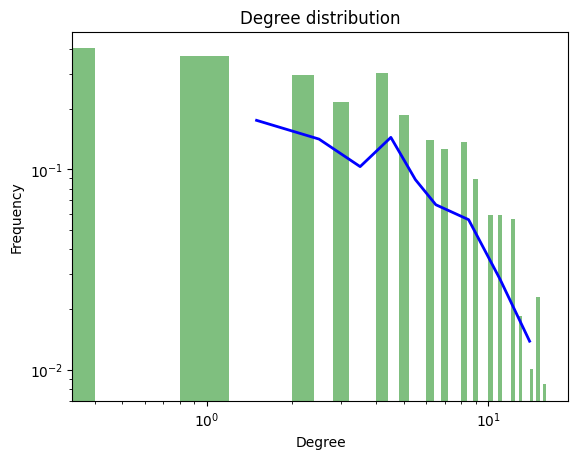

In [ ]:
import powerlaw

# Extract the data from the histogram
data = flat_degree_dists[10000:]

# Fit a power-law distribution to the data using MLE
fit = powerlaw.Fit(data, xmin=1, discrete=True)

# Print the estimated power-law exponent
print(fit.alpha)

# Plot the histogram and the fitted PDF
fit.plot_pdf(color='b', linewidth=2)
plt.hist(data, bins=40, density=True, alpha=0.5, color='g')

# Set the plot title and labels
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Best-fit parameters: alpha = 1.510103968035351, xmin = 1.0


AttributeError: ignored

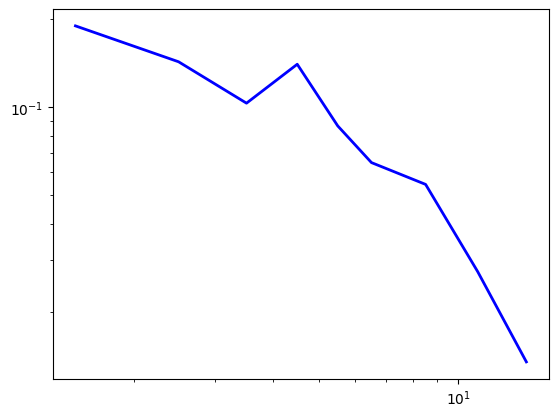

In [ ]:
import powerlaw
import numpy as np

flat_degree_dists = np.array(degree_dists).flatten()

# Remove values of zero or less, as they cannot be plotted on a log-log scale
flat_degree_dists = flat_degree_dists[flat_degree_dists > 0]

# Fit power-law distribution to the degree distribution data
fit = powerlaw.Fit(flat_degree_dists, xmin=1, discrete=True)

# Get the best-fit parameters for the power-law distribution
alpha = fit.alpha
xmin = fit.xmin

# Print the best-fit parameters
print('Best-fit parameters: alpha = {}, xmin = {}'.format(alpha, xmin))

# Plot the data and the fitted power-law distribution on a log-log scale
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fit.ax)

# Set the plot title and labels
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Probability density')

# Show the plot
plt.show()


<ipython-input-41-2ceb549076fc>:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


a = 36662.33807124397 , b = 0.1903772513596073


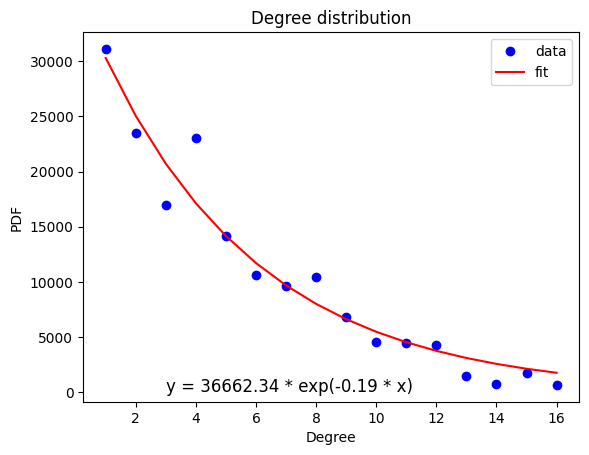

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the exponential function to fit to the data
def exponential_func(x, a, b):
    return a * np.exp(-b * x)

# Generate some sample data
x = degrees
y = freqs

# Fit the exponential curve to the data
popt, pcov = curve_fit(exponential_func, x, y)

# Print the fitted parameters
a = popt[0]
b = popt[1]
print("a =", a, ", b =", b)

# Plot the data and the fitted curve
plt.plot(x, y, 'bo', label='data')
plt.plot(x, exponential_func(x, *popt), 'r-', label='fit')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.legend()

# Add the equation of the curve to the plot
eqn = f'y = {a:.2f} * exp(-{b:.2f} * x)'
plt.text(3, 20, eqn, fontsize=12)

plt.show()


In [ ]:
(flat_degree_dists[50000:])

array([ 3,  4,  0, ...,  7, 15,  2])

Create temporal evolution of degree dist

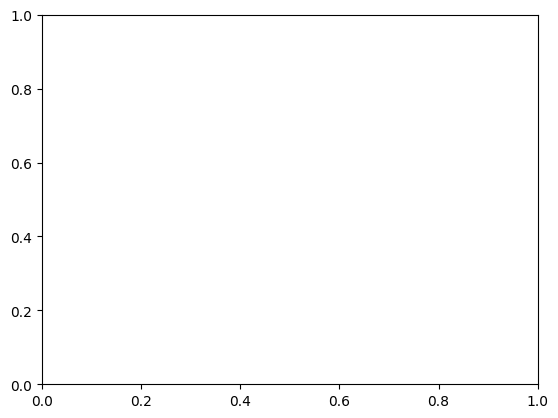

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import imageio

# Create a video of degree distribution histograms for each time step
fig, ax = plt.subplots()

images = []
for t, degree_dist in enumerate(degree_dists):
    # Plot the histogram
    ax.hist(degree_dist, bins=20, density=True)
    ax.set_xlim([0, max(degree_dist)+1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Degree')
    ax.set_ylabel('Probability')
    ax.set_title(f'Time step {t}')
    fig.canvas.draw()

    # Save the figure as an image
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

    # Clear the plot for the next iteration
    ax.clear()

# Save the images as a video
imageio.mimsave('degree_dist_histograms.mp4', images, fps=10)

# Introduce an agent which repels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set parameters
N = 100  # number of agents
L = 50.0  # size of square region
v = 0.10  # magnitude of velocity
eta = 0.1  # noise strength
r = 1.0  # interaction radius
drep = 2 # repulsion distance
num_steps = 2000  # number of simulation steps

# Set initial positions and velocities randomly
positions = L * np.random.rand(N, 2)
velocities = v * np.random.rand(N, 2)

# Add repelling agent
repel_pos = np.array([L/2, L/2])  # position of repelling agent
repel_vel = np.zeros(2)  # velocity of repelling agent

# Define update function
def update(positions, velocities):
    global repel_pos, repel_vel
    # Calculate average direction of neighbors within radius r
    angles = np.zeros(N)
    for i in range(N):
        dists = np.sqrt(np.sum((positions - positions[i])**2, axis=1))
        neighbors = np.where(dists < r)[0]
        if len(neighbors) > 0:
            angles[i] = np.mean(np.arctan2(velocities[neighbors, 1], velocities[neighbors, 0]))

    # Repel from all agents within distance drep
    repel_dists = np.sqrt(np.sum((positions - repel_pos)**2, axis=1))
    repel_neighbors = np.where(repel_dists < drep)[0]
    if len(repel_neighbors) > 0:
        repel_dir = np.mean(positions[repel_neighbors] - repel_pos, axis=0)
        repel_dir /= np.linalg.norm(repel_dir)
        repel_vel = 2 * v * repel_dir
    else:
        repel_vel *= 0

    # Update velocities with noise and repulsion
    angles += eta * np.random.randn(N)
    velocities[:, 0] = v * np.cos(angles)
    velocities[:, 1] = v * np.sin(angles)
    velocities += repel_vel

    # Update positions
    positions += velocities

    # Apply periodic boundary conditions
    positions[positions < 0] += L
    positions[positions > L] -= L

    return positions, velocities

# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Define function to update plot at each time step
def animate(i):
    global positions, velocities, data
    positions, velocities = update(positions, velocities)
    data[i] = np.concatenate([positions.flatten(), velocities.flatten()])
    ax.clear()
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.scatter(positions[:, 0], positions[:, 1], color='b')
    ax.quiver(positions[:, 0], positions[:, 1], velocities[:, 0], velocities[:, 1], color='r')
    ax.scatter(repel_pos[0], repel_pos[1], color='g', marker='*', s=200)
    plt.title('Step {}'.format(i+1))

# Create animation and save as video
data = np.zeros((num_steps, N*4))
ani = animation.FuncAnimation(fig, animate, frames=num_steps, interval=50)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
ani.save('vicsek_repeln100.mp4', writer=writer)

# Save position and velocity data to Excel file
df = pd.DataFrame(data, columns=[f'x{i}' for i in range(N)] + [f'y{i}' for i in range(N)]
                  + [f'vx{i}' for i in range(N)] + [f'vy{i}' for i in range(N)])
df.to_excel('vicsek_data_repelN100.xlsx', index=False)

plt.show()

CalledProcessError: ignored

Error in callback <function _draw_all_if_interactive at 0x7fac774b9700> (for post_execute):


IndexError: ignored

IndexError: ignored

<Figure size 500x500 with 1 Axes>

Aother repel trial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set parameters
N = 101  # number of agents including the new agent
L = 50.0  # size of square region
v = 0.10  # magnitude of velocity
eta = 0.1  # noise strength
r = 1.0  # interaction radius
r_repel = 2.0  # repulsion radius for the new agent
num_steps = 2000  # number of simulation steps

# Set initial positions and velocities randomly for N-1 agents
positions = L * np.random.rand(N-1, 2)
velocities = v * np.random.rand(N-1, 2)

# Add new agent at the center with random velocity
new_pos = L/2*np.ones((1, 2))
new_vel = v*np.random.rand(1, 2)
positions = np.concatenate([positions, new_pos], axis=0)
velocities = np.concatenate([velocities, new_vel], axis=0)

# Define update function
def update(positions, velocities):
    # Calculate average direction of neighbors within radius r
    angles = np.zeros(N)
    for i in range(N):
        dists = np.sqrt(np.sum((positions - positions[i])**2, axis=1))
        neighbors = np.where(dists < r)[0]
        if len(neighbors) > 0:
            angles[i] = np.mean(np.arctan2(velocities[neighbors, 1], velocities[neighbors, 0]))

    # Update velocities with noise
    angles += eta * np.random.randn(N)
    velocities[:, 0] = v * np.cos(angles)
    velocities[:, 1] = v * np.sin(angles)

    # Add random velocity for the new agent
    velocities[-1, :] += eta*np.random.randn(2)

    # Calculate distances to new agent and apply repulsion
    for i in range(N-1):
        dist = np.sqrt(np.sum((positions[-1] - positions[i])**2))
        if dist < r_repel:
            repel_vector = positions[-1] - positions[i]
            velocities[i] -= 2*(np.dot(velocities[i], repel_vector)/np.dot(repel_vector, repel_vector))*repel_vector

    # Update positions
    positions += velocities

    # Apply periodic boundary conditions
    positions[positions < 0] += L
    positions[positions > L] -= L

    return positions, velocities

# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Define function to update plot at each time step
def animate(i):
    global positions, velocities, data
    positions, velocities = update(positions, velocities)
    data[i] = np.concatenate([positions.flatten(), velocities.flatten()])
    ax.clear()
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.scatter(positions[:-1, 0], positions[:-1, 1], color='b')
    ax.scatter(positions[-1, 0], positions[-1, 1], color='r')
    ax.quiver(positions[:-1, 0], positions[:-1, 1], velocities[:-1, 0], velocities[:-1, 1], color='b')
    ax.quiver(positions[-1, 0], positions[-1, 1], velocities[-1, 0], velocities[-1, 1], color='r')


In [ ]:


def update(positions, velocities):
    # Calculate average direction of neighbors within radius r
    angles = np.zeros(N)
    for i in range(N):
        dists = np.sqrt(np.sum((positions - positions[i])**2, axis=1))
        neighbors = np.where(dists < r)[0]
        if len(neighbors) > 0:
            angles[i] = np.mean(np.arctan2(velocities[neighbors, 1], velocities[neighbors, 0]))

    # Introduce a repelling agent
    repel_agent = np.array([[L/2, L/2]])  # set the position of the repelling agent
    repel_distances = np.sqrt(np.sum((positions - repel_agent)**2, axis=1))
    repel_indices = np.where(repel_distances < 5)[0]  # indices of agents within 5 of the repelling agent
    if len(repel_indices) > 0:
        repel_directions = positions[repel_indices] - repel_agent
        repel_directions /= np.linalg.norm(repel_directions, axis=1)[:, np.newaxis]
        repel_velocities = np.zeros((N, 2))
        repel_velocities[repel_indices] = -repel_directions

    # Update velocities with noise and repelling velocities
    angles += eta * np.random.randn(N)
    velocities[:, 0] = v * np.cos(angles)
    velocities[:, 1] = v * np.sin(angles)
    if len(repel_indices) > 0:
        velocities += repel_velocities

    # Update positions
    positions += velocities

    # Apply periodic boundary conditions
    positions[positions < 0] += L
    positions[positions > L] -= L

    return positions, velocities


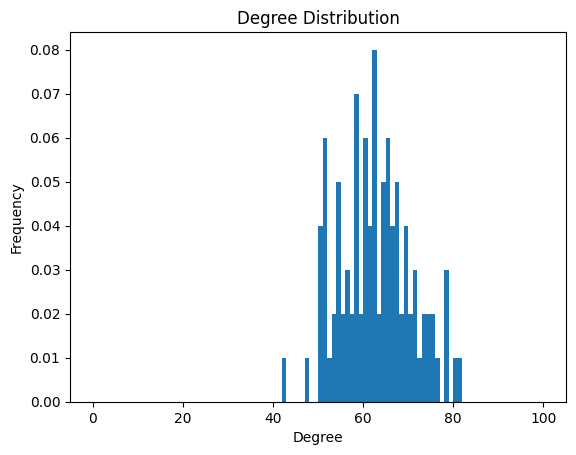

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load position and velocity data from Excel file
df = pd.read_excel('vicsek_data_N100.xlsx')

# Define cutoff radius and construct adjacency matrix
cutoff_radius = 5
N = 100
A = np.zeros((N, N))
for t in range(2000):
    x = df.iloc[t, :N].values
    y = df.iloc[t, N:2*N].values
    for i in range(N):
        for j in range(i+1, N):
            dx = x[j] - x[i]
            dy = y[j] - y[i]
            d = np.sqrt(dx**2 + dy**2)
            if d < cutoff_radius:
                A[i, j] += 1
                A[j, i] += 1

# Convert adjacency matrix to networkx graph and calculate degree distribution
G = nx.Graph(A)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot degree distribution
plt.hist(degree_sequence, bins=range(N+1), density=True)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


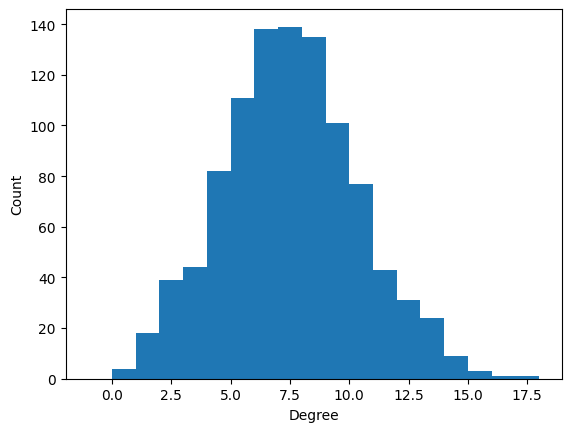

In [ ]:
import numpy as np
import networkx as nx
from scipy.spatial import KDTree

# Parameters
N = 1000  # number of particles
L = 20  # length of simulation box
v = 0.03  # particle speed
r = 1  # interaction radius
dt = 0.1  # time step
steps = 500  # number of simulation steps

# Initialize positions and velocities randomly
pos = np.random.uniform(0, L, (N, 2))
vel = np.random.uniform(-v, v, (N, 2))

# Initialize graph
G = nx.Graph()

# Simulation loop
for i in range(steps):
    # Calculate average direction of neighbors within interaction radius
    tree = KDTree(pos)
    for j in range(N):
        neighbors = tree.query_ball_point(pos[j], r)
        if len(neighbors) > 1:
            avg_dir = np.mean(vel[neighbors], axis=0)
            vel[j] = v * avg_dir / np.linalg.norm(avg_dir)

    # Update positions
    pos += vel * dt

    # Add edges to graph
    dist_matrix = np.linalg.norm(pos - pos[:, np.newaxis], axis=2)
    for j in range(N):
        neighbors = np.where(dist_matrix[j] < r)[0]
        for k in neighbors:
            if j != k:
                G.add_edge(j, k)

# Calculate degree distribution
degree_dist = np.array(list(dict(nx.degree(G)).values()))
bins = np.arange(0, np.max(degree_dist) + 1.5) - 0.5
hist, edges = np.histogram(degree_dist, bins=bins)

# Plot degree distribution
import matplotlib.pyplot as plt
plt.bar(edges[:-1], hist, width=1)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


(1000, 1000)

# Create a network based on distance

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Load the data from the Excel file
df = pd.read_excel('vicsek_data_N100.xlsx')

# Extract the position columns
x_cols = [col for col in df.columns if col.startswith('x')]
y_cols = [col for col in df.columns if col.startswith('y')]
positions = df[x_cols + y_cols].values

# Calculate pairwise distances
distances = squareform(pdist(positions))


In [ ]:
np.shape(x_cols)

(100,)

We can then use ```
distances
```  matrix to construct a network by connecting points that are within a certain distance threshold:

In [ ]:
import networkx as nx

# Set a distance threshold for the network
threshold = 5.0

# Create a graph from the pairwise distances
graph = nx.Graph()
n = len(positions)
for i in range(n):
    for j in range(i+1, n):
        if distances[i,j] <= threshold:
            graph.add_edge(i, j)


Now that we have a network, we can compute various network parameters to analyze its properties. One parameter that can tell us about the existence of hubs in the network is the degree distribution. We can compute the degree of each node (i.e., the number of edges connected to it) using nx.degree() and then plot the degree distribution using matplotlib:

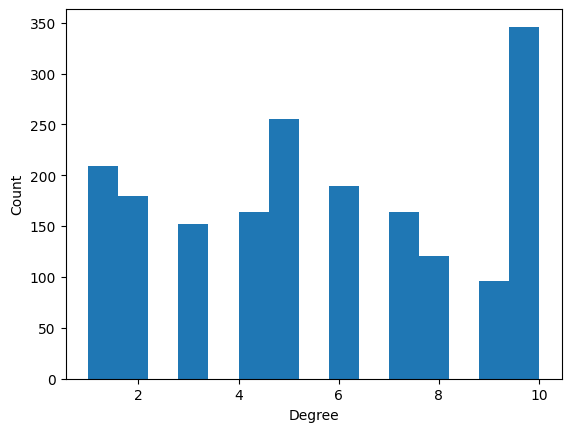

In [ ]:
import matplotlib.pyplot as plt

# Compute the degree of each node
degrees = [graph.degree(node) for node in graph.nodes()]

# Plot the degree distribution
plt.hist(degrees, bins=15)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


Normal fit

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the degree of each node
degrees = [graph.degree(node) for node in graph.nodes()]

# Plot the degree distribution histogram
plt.hist(degrees, bins=20, density=True, alpha=0.5, label='Degree Distribution')

# Plot the distribution curve
mu, std = np.mean(degrees), np.std(degrees)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.show()


NameError: ignored

Exp fit

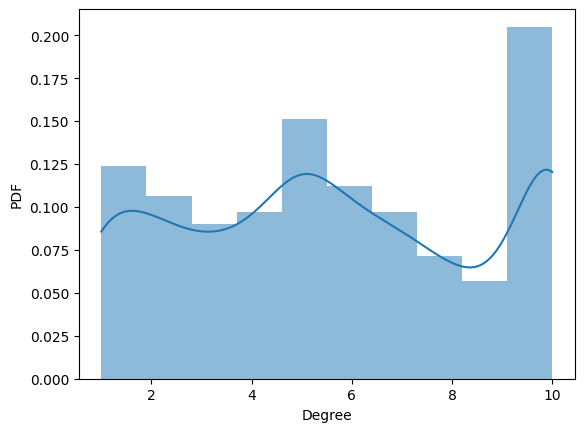

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the degree of each node
degrees = [graph.degree(node) for node in graph.nodes()]

# Plot the degree distribution histogram and curve
sns.histplot(degrees, bins=10, kde=True, stat='density', linewidth=0)
plt.xlabel('Degree')
plt.ylabel('PDF')
plt.show()


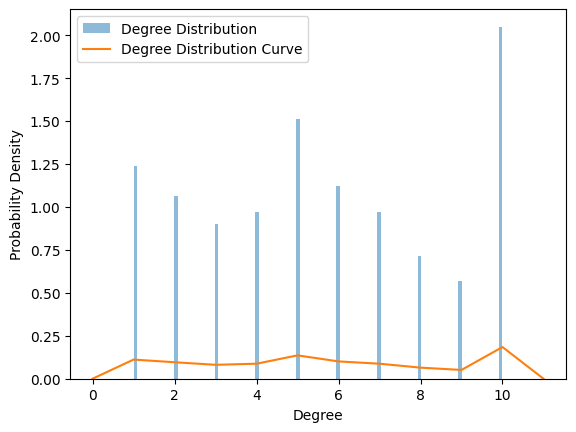

In [ ]:
import matplotlib.pyplot as plt

# Compute the degree of each node
degrees = [graph.degree(node) for node in graph.nodes()]

# Plot the degree distribution histogram
plt.hist(degrees, bins=100, density=True, alpha=0.5, label='Degree Distribution')

# Plot the distribution curve
x = range(0, 12)
y = [degrees.count(i)/float(nx.number_of_nodes(graph)) for i in x]
plt.plot(x, y, label='Degree Distribution Curve')

# Add axis labels and a legend
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


If the degree distribution follows a power law, it suggests the presence of hubs in the network.

Another property we can look at is the clustering coefficient, which measures the degree to which nodes in the network tend to cluster together. We can compute the clustering coefficient using **nx.average_clustering():**

In [ ]:
# Compute the average clustering coefficient
clustering_coefficient = nx.average_clustering(graph)

print(f'Average clustering coefficient: {clustering_coefficient}')


Average clustering coefficient: 0.7793286966527948


A high value of clustering coefficient in a network indicates that nodes in the network tend to form tightly interconnected clusters or communities. This means that nodes in the same cluster are highly likely to be connected to each other, forming densely connected sub-networks within the larger network.

Average path length: 1.1086499779885766


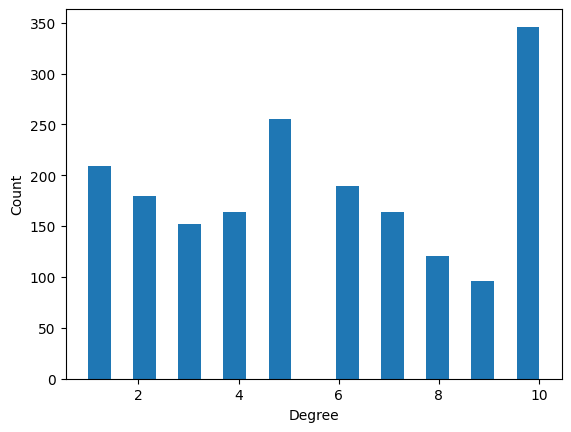

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('vicsek_data_N100.xlsx')

# Extract the position columns
x_cols = [col for col in df.columns if col.startswith('x')]
y_cols = [col for col in df.columns if col.startswith('y')]
positions = df[x_cols + y_cols].values

# Calculate pairwise distances
distances = squareform(pdist(positions))

# Set a distance threshold for the network
threshold = 5.0

# Create a graph from the pairwise distances
graph = nx.Graph()
n = len(positions)
for i in range(n):
    for j in range(i+1, n):
        if distances[i,j] <= threshold:
            graph.add_edge(i, j)

# Compute the degree of each node
degrees = [graph.degree(node) for node in graph.nodes()]

# Calculate the average path length for each connected component
components = nx.connected_components(graph)
avg_path_lengths = []
for component in components:
    subgraph = graph.subgraph(component)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    avg_path_lengths.append(avg_path_length)

# Compute the average of the average path lengths
avg_avg_path_length = np.mean(avg_path_lengths)

# Print the average path length
print("Average path length:", avg_avg_path_length)

# Plot the degree distribution
plt.hist(degrees, bins=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


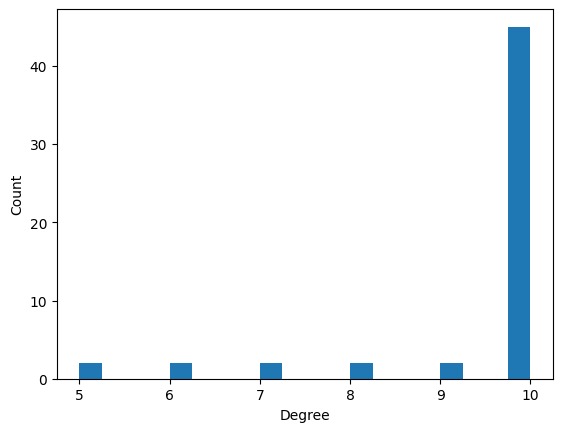

Diameter of the largest connected component: 11


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('vicsek_data_N100.xlsx')

# Extract the position columns
x_cols = [col for col in df.columns if col.startswith('x')]
y_cols = [col for col in df.columns if col.startswith('y')]
positions = df[x_cols + y_cols].values

# Calculate pairwise distances
distances = squareform(pdist(positions))

# Set a distance threshold for the network
threshold = 5.0

# Create a graph from the pairwise distances
graph = nx.Graph()
n = len(positions)
for i in range(n):
    for j in range(i+1, n):
        if distances[i,j] <= threshold:
            graph.add_edge(i, j)

# Find the largest connected component of the graph
largest_cc = max(nx.connected_components(graph), key=len)
subgraph = graph.subgraph(largest_cc)

# Compute the degree of each node
degrees = [subgraph.degree(node) for node in subgraph.nodes()]

# Plot the degree distribution
plt.hist(degrees, bins=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

# Calculate the diameter of the largest connected component
diameter = nx.algorithms.distance_measures.diameter(subgraph)
print("Diameter of the largest connected component:", diameter)


# Viscek but reflective boundary condition

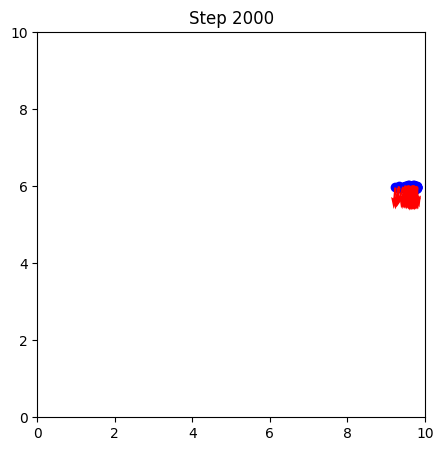

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Set parameters
N = 100  # number of agents
L = 10.0  # size of square region
v = 0.10  # magnitude of velocity
eta = 0.1  # noise strength
r = 1.0  # interaction radius
num_steps = 2000  # number of simulation steps

# Set initial positions and velocities randomly
positions = L * np.random.rand(N, 2)
velocities = v * np.random.rand(N, 2)

# Define update function
def update(positions, velocities):
    # Calculate average direction of neighbors within radius r
    angles = np.zeros(N)
    for i in range(N):
        dists = np.sqrt(np.sum((positions - positions[i])**2, axis=1))
        neighbors = np.where(dists < r)[0]
        if len(neighbors) > 0:
            angles[i] = np.mean(np.arctan2(velocities[neighbors, 1], velocities[neighbors, 0]))

    # Update velocities with noise
    angles += eta * np.random.randn(N)
    velocities[:, 0] = v * np.cos(angles)
    velocities[:, 1] = v * np.sin(angles)

    # Update positions
    positions += velocities

    # Apply reflective boundary conditions
    for i in range(N):
        if positions[i, 0] < 0:
            positions[i, 0] = -positions[i, 0]
            velocities[i, 0] = -velocities[i, 0]
        elif positions[i, 0] > L:
            positions[i, 0] = 2 * L - positions[i, 0]
            velocities[i, 0] = -velocities[i, 0]

        if positions[i, 1] < 0:
            positions[i, 1] = -positions[i, 1]
            velocities[i, 1] = -velocities[i, 1]
        elif positions[i, 1] > L:
            positions[i, 1] = 2 * L - positions[i, 1]
            velocities[i, 1] = -velocities[i, 1]

    return positions, velocities


# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Define function to update plot at each time step
def animate(i):
    global positions, velocities, data
    positions, velocities = update(positions, velocities)
    data[i] = np.concatenate([positions.flatten(), velocities.flatten()])
    ax.clear()
    ax.set_xlim([0, L])
    ax.set_ylim([0, L])
    ax.scatter(positions[:, 0], positions[:, 1], color='b')
    ax.quiver(positions[:, 0], positions[:, 1], velocities[:, 0], velocities[:, 1], color='r')
    plt.title('Step {}'.format(i+1))

# Create animation and save as video
data = np.zeros((num_steps, N*4))
ani = animation.FuncAnimation(fig, animate, frames=num_steps, interval=50)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save('vicsek.mp4', writer=writer)

# Save position and velocity data to Excel file
df = pd.DataFrame(data, columns=[f'x{i}' for i in range(N)] + [f'y{i}' for i in range(N)]
                  + [f'vx{i}' for i in range(N)] + [f'vy{i}' for i in range(N)])
df.to_excel('vicsek_data.xlsx', index=False)

plt.show()


In [ ]:
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('vicsek_data.xlsx')

# Get the number of particles (N)
N = int(len(df.columns)/4)

# Loop through each time step
for i in range(len(df)):
    # Get the x, y, vx, and vy data for this time step
    x = df.iloc[i, :N].values
    y = df.iloc[i, N:2*N].values
    vx = df.iloc[i, 2*N:3*N].values
    vy = df.iloc[i, 3*N:].values






In [ ]:
import numpy as np
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('vicsek_data.xlsx')

# Get the number of particles (N)
N = int(len(df.columns)/4)
rc= 5
# Initialize an empty array to store the degree distributions
degree_distributions = []

# Loop through each time step
for i in range(len(df)):
    # Get the x, y, vx, and vy data for this time step
    x = df.iloc[i, :N].values
    y = df.iloc[i, N:2*N].values

    # Calculate the distance matrix between particles
    distance_matrix = np.sqrt((x - x[:, np.newaxis])**2 + (y - y[:, np.newaxis])**2)

    # Calculate the adjacency matrix
    adjacency_matrix = np.where(distance_matrix < rc, 1, 0)

    # Calculate the degree distribution
    degree_distribution = np.sum(adjacency_matrix, axis=0)

    # Append the degree distribution to the array
    degree_distributions.append(degree_distribution)



In [ ]:
degree_distributions[499]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [ ]:
x

array([9.30278181, 7.46938374, 9.2543723 , 7.46930619, 9.41763454,
       7.43508783, 9.35661229, 7.444143  , 8.99512239, 7.45913363])

# Degree distribution calculation
# Clustering coeff calculation

In [ ]:
import numpy as np
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('vicsek_data.xlsx')

# Get the number of particles (N)
N = int(len(df.columns)/4)

#Define angle and distance threshold
ra=np.pi/4
rc=1



# Initialize an empty array to store the clustering coefficients
clustering_coefficients = []

# Loop through each time step
for i in range(len(df)):
    # Get the x, y, vx, and vy data for this time step
    x = df.iloc[i, :N].values
    y = df.iloc[i, N:2*N].values
    vx = df.iloc[i, 2*N:3*N].values
    vy = df.iloc[i, 3*N:].values

    # Calculate the distance matrix between particles
    distance_matrix = np.sqrt((x - x[:, np.newaxis])**2 + (y - y[:, np.newaxis])**2)

    # Calculate the angle matrix between particles
    angle_matrix = np.arctan2(vy - vy[:, np.newaxis], vx - vx[:, np.newaxis])

    # Calculate the difference in angles between particles
    angle_diff = np.abs(angle_matrix - angle_matrix[:, np.newaxis])

    # Calculate the adjacency matrix
    adjacency_matrix = np.where(np.logical_and(distance_matrix < rc, angle_diff < ra), 1, 0)

    # Calculate the degree distribution
    degree_distribution = np.sum(adjacency_matrix, axis=0)

    # Calculate the clustering coefficients
    clustering_coefficients_t = []
    for j in range(N):
        neighbors = np.where(adjacency_matrix[j, :] == 1)[0]
        num_connections = 0
        for k in range(len(neighbors)):
            for l in range(k+1, len(neighbors)):
              if np.all(adjacency_matrix[neighbors[k], neighbors[l]] == 1):


                    num_connections += 1
        total_connections = len(neighbors) * (len(neighbors) - 1) / 2
        clustering_coefficient = num_connections / total_connections if total_connections > 0 else 0
        clustering_coefficients_t.append(clustering_coefficient)

    # Append the clustering coefficients to the array
    clustering_coefficients.append(clustering_coefficients_t)

# Convert the array to a DataFrame and save it to a CSV file
#df_clustering = pd.DataFrame(clustering_coefficients, columns=[f'clustering_{i}' for i in range(N)])
#df_clustering.to_csv('vicsek_clustering.csv', index=False)


KeyboardInterrupt: ignored